| Kolom                    | Interpretasi                                  |
| ------------------------ | --------------------------------------------- |
| Age                      | Usia                                          |
| Attrition                | Tidak bekerja lagi                            |
| BusinessTravel           | Frekuensi bepergian (travelling)              |
| DailyRate                | Upah harian                                   |
| Department               | Departmen pada pekerjaan                      |
| DistanceFromHome         | Jarak dari rumah ke tempat kerja (KM)         |
| Education                |  1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' |
| EducationField           | Bidang pendidikan                             |
| EmployeeCount            |                                               |
| EmployeeNumber           |                                               |
| EnvironmentSatisfaction  | Kepuasan terhadap lingkungan kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'            |
| Gender                   | Jenis kelamin                                 |
| HourlyRate               | Upah perjam                                   |
| JobInvolvement           | Tingkat keterlibatan kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'                   |
| JobLevel                 | Level kesulitan pekerjaan                     |
| JobRole                  | Posisi Pekerjaan                              |
| JobSatisfaction          | Kepuasan terhadap pekerjaan => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'                  |
| MaritalStatus            | Status Perkawinan                             |
| MonthlyIncome            | Income Bulanan                                |
| MonthlyRate              | Upah Bulanan                                  |
| NumCompaniesWorked       | Banyaknya perusahaan tempat bekerja           |
| Over18                   | Apakah usianya > 18?                          |
| OverTime                 | Apakah jam kerja overtime?                    |
| PercentSalaryHike        | Persentase kenaikan gaji                      |
| PerformanceRating        | Rating performa kerja  => 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'                       |
| RelationshipSatisfaction | Kepuasan terhadap relasi di tempat kerja => 1 'Low' 2 'Medium' 3 'High' 4 'Very High'      |
| StandardHours            | Standard jam kerja                            |
| StockOptionLevel         |                                               |
| TotalWorkingYears        | Lama bekerja (Tahun)                          |
| TrainingTimesLastYear    | Jumlah training tahun kemarin                 |
| WorkLifeBalance          | Keseimbangan kerja => 1 'Bad' 2 'Good' 3 'Better' 4 'Best'                           |
| YearsAtCompany           | Lama bekerja pada perusahaan                  |
| YearsInCurrentRole       | Lama bekerja pada posisi ini                  |
| YearsSinceLastPromotion  | Lama berkerja sejak kenaikan jabatan terakhir |
| YearsWithCurrManager     | Lama bekerja dengan manager saat ini          |

# __DATA PREPROCESSING__

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

In [28]:
df = pd.read_excel('C:/Users/ASUS/Documents/BOOTHCAMP RAKAMIN BATCH 27/FINAL PROJECT/Stage 1/Employee-Attrition/Employee-Attrition.xlsx')

#drop fitur yang seharusnya di drop
df = df.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole'], axis=1)
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,Female,...,0,Yes,22,4,2,1,3,2,0,4
812,43,No,Travel_Frequently,1082,Research & Development,27,3,Life Sciences,3,Female,...,8,No,11,3,3,1,1,3,0,1
233,50,No,Travel_Rarely,854,Sales,1,4,Medical,4,Female,...,3,No,11,3,3,1,3,2,0,6
215,41,No,Travel_Rarely,896,Sales,6,3,Life Sciences,4,Female,...,3,Yes,18,3,3,0,3,3,0,0
815,21,No,Travel_Rarely,984,Research & Development,1,1,Technical Degree,4,Female,...,1,Yes,11,3,3,0,6,4,2,2
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,Female,...,9,No,12,3,1,1,5,1,0,3
172,36,No,Travel_Frequently,1480,Research & Development,3,2,Medical,4,Male,...,4,No,12,3,3,0,3,2,7,2
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,...,2,No,14,3,2,3,2,3,0,2
1317,27,No,Travel_Frequently,1297,Research & Development,5,2,Life Sciences,4,Female,...,0,Yes,14,3,3,0,3,2,0,2
927,36,No,Travel_Rarely,429,Research & Development,2,4,Life Sciences,3,Female,...,9,Yes,11,3,4,0,2,3,5,12


In [29]:
#mengubah tipe data yang tidak sesuai
for i in ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','PerformanceRating','JobInvolvement','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']:
        df[i] = df[i].astype(str)

## __HANDLE MISSING VALUE__

Dataset ini tidak memiliki missing value, sehingga tidak perlu dilakukan penanganan

## __HANDLE DUPLICATED DATA__

Dataset ini tidak memiliki duplikasi

## __HANDLE OUTLIERS__

In [30]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

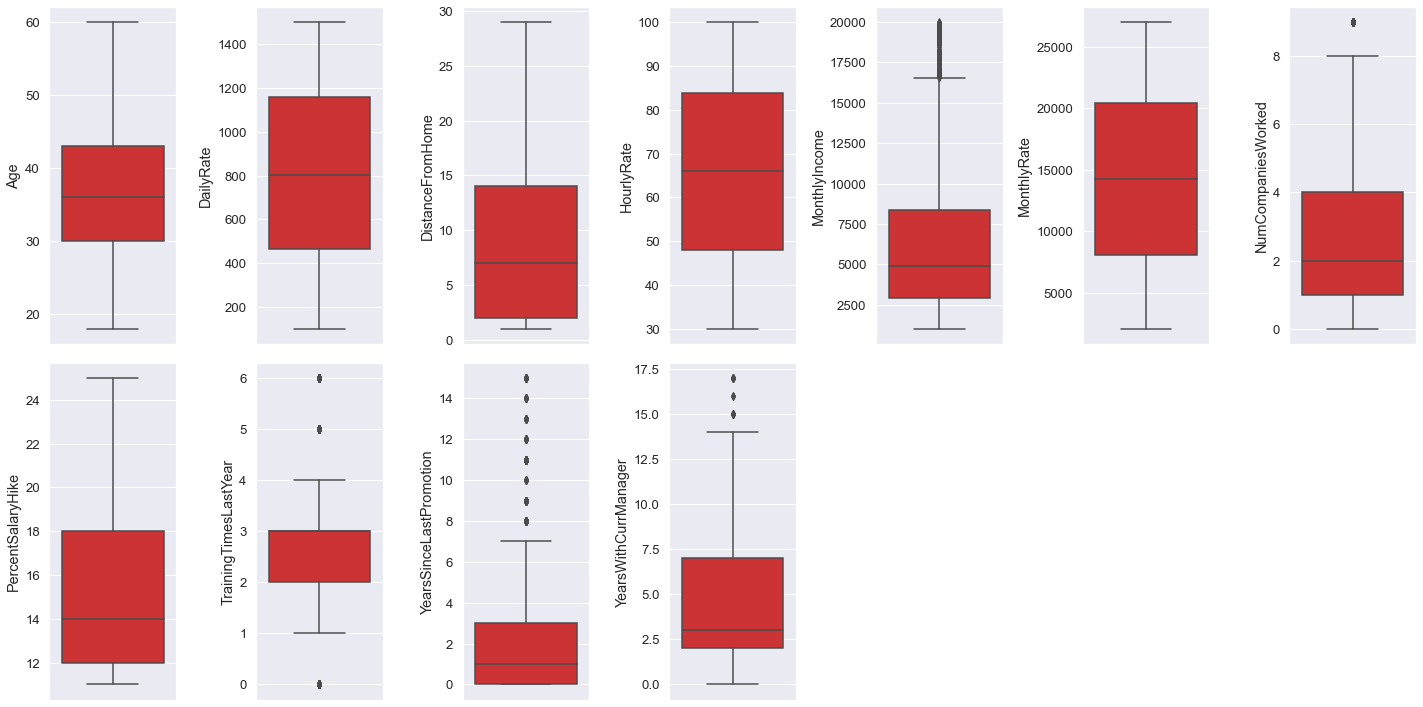

In [31]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

In [32]:
num = df.select_dtypes('number')

kolom,out,high,low = [],[],[],[]
for i in num:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (1.5*iqr)
        highlimit = q3 + (iqr*1.5)

        outlier = df[ (df[i]<lowlimit) | (df[i]>highlimit)].shape[0]

        if outlier>0:
                kolom.append(i)
                out.append(outlier)
                low.append(lowlimit)
                high.append(highlimit)

data = pd.DataFrame({
        'Kolom':kolom,
        'Outliers':out,
        'Low Limit':low,
        'High Limit':high
})

data['Persentase (%)'] = round(data['Outliers']/df.shape[0]*100,2)
data

,Kolom,Outliers,Low Limit,High Limit,Persentase (%)
0,MonthlyIncome,114,-5291.0,16581.0,7.76
1,NumCompaniesWorked,52,-3.5,8.5,3.54
2,TrainingTimesLastYear,238,0.5,4.5,16.19
3,YearsSinceLastPromotion,107,-4.5,7.5,7.28
4,YearsWithCurrManager,14,-5.5,14.5,0.95


In [33]:
print(f"Persentase total outlier : {data['Outliers'].sum()/df.shape[0]*100:.2f}%")

Persentase total outlier : 35.71%


Karena persentase total outlier sangat besar yakni hingga 35,71% dari total data, maka kami akan melakukan replace value dengan median

[Source](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

In [34]:
for i in num:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (1.5*iqr)
        highlimit = q3 + (iqr*1.5)

        outlier = df[ (df[i]<lowlimit) | (df[i]>highlimit)].shape[0]

        if outlier>0:
                df.loc[df[i]>highlimit, i ] = df[i].median()
                df.loc[df[i]<lowlimit, i ] = df[i].median()

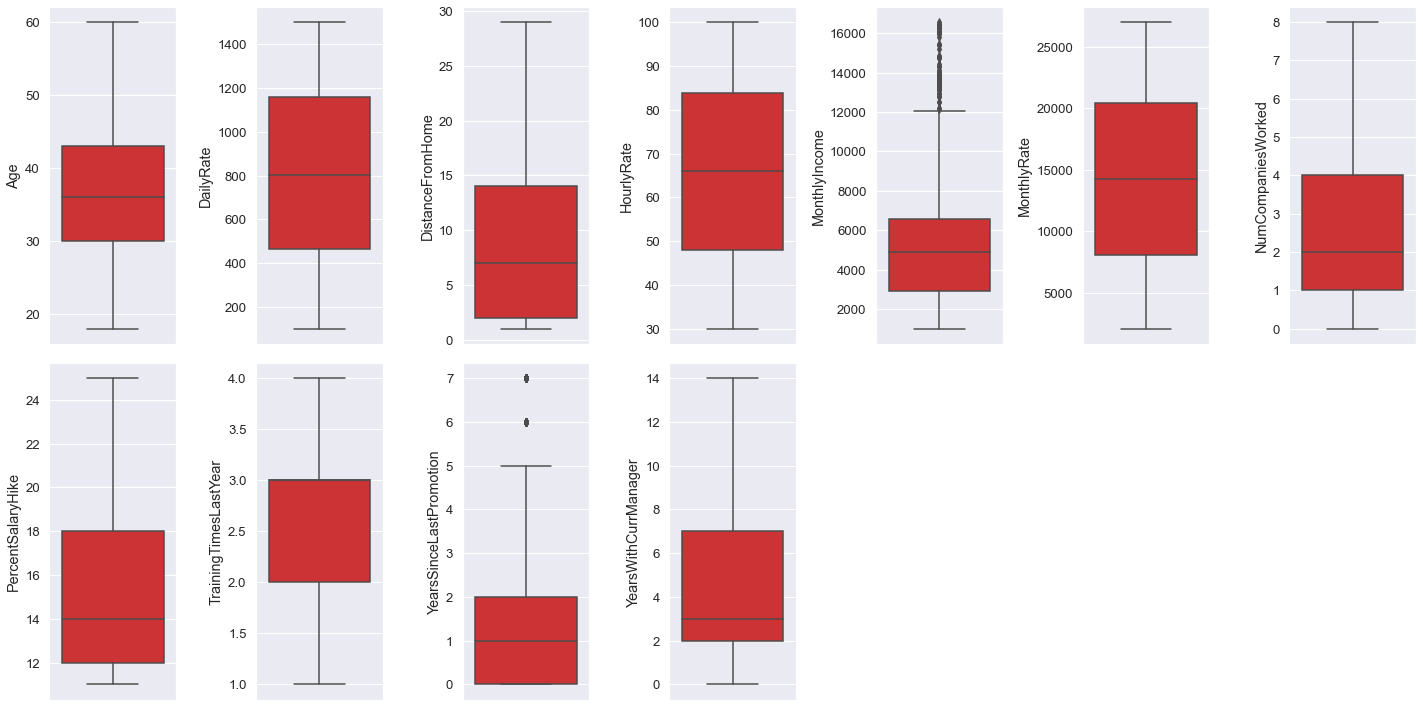

In [35]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

## __FEATURE TRANSFORMATION__

In [36]:
#mengubah kembali tipe data yang tidak sesuai
for i in ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','PerformanceRating','JobInvolvement','RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel']:
        df[i] = df[i].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int32  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int32  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int32  
 12  JobLevel                  1470 non-null   int32  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

kategori yang memiliki Unique Value > 3 akan menggunakan OneHots encoding, sedangkan kategori yang memiliki Unique Value < 3 akan menggunakan encoding biasa

untuk kategori `EducationField` dan `JobRole` akan menggunakan OneHots encoding

untuk kategori `Attrition`,`BusinessTravel`, `Department`, `Gender`, `Overtime` akan menggugnakan encoding biasa 

In [38]:
# melakukan encode pada categori `Attrition`,`BusinessTravel`, `Department`, `Gender`, `Overtime` 
df['Attrition'] = df['Attrition'].astype('category').cat.codes
df['BusinessTravel'] = df['BusinessTravel'].astype('category').cat.codes
df['Department'] = df['Department'].astype('category').cat.codes
df['Gender'] = df['Gender'].astype('category').cat.codes
df['OverTime'] = df['OverTime'].astype('category').cat.codes
df['MaritalStatus'] = df['MaritalStatus'].astype('category').cat.codes

In [39]:
# OneHots Encode EducationField, JobRole 
for cat in ['EducationField', 'JobRole']:
    OneHots = pd.get_dummies(df[cat], prefix = cat)
    df = df.join(OneHots)

In [40]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df_new = df.drop(columns=['EducationField','JobRole']).copy()

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int8   
 2   BusinessTravel                     1470 non-null   int8   
 3   DailyRate                          1470 non-null   int64  
 4   Department                         1470 non-null   int8   
 5   DistanceFromHome                   1470 non-null   int64  
 6   Education                          1470 non-null   int32  
 7   EnvironmentSatisfaction            1470 non-null   int32  
 8   Gender                             1470 non-null   int8   
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int32  
 11  JobLevel                           1470 non-null   int32

<AxesSubplot:>

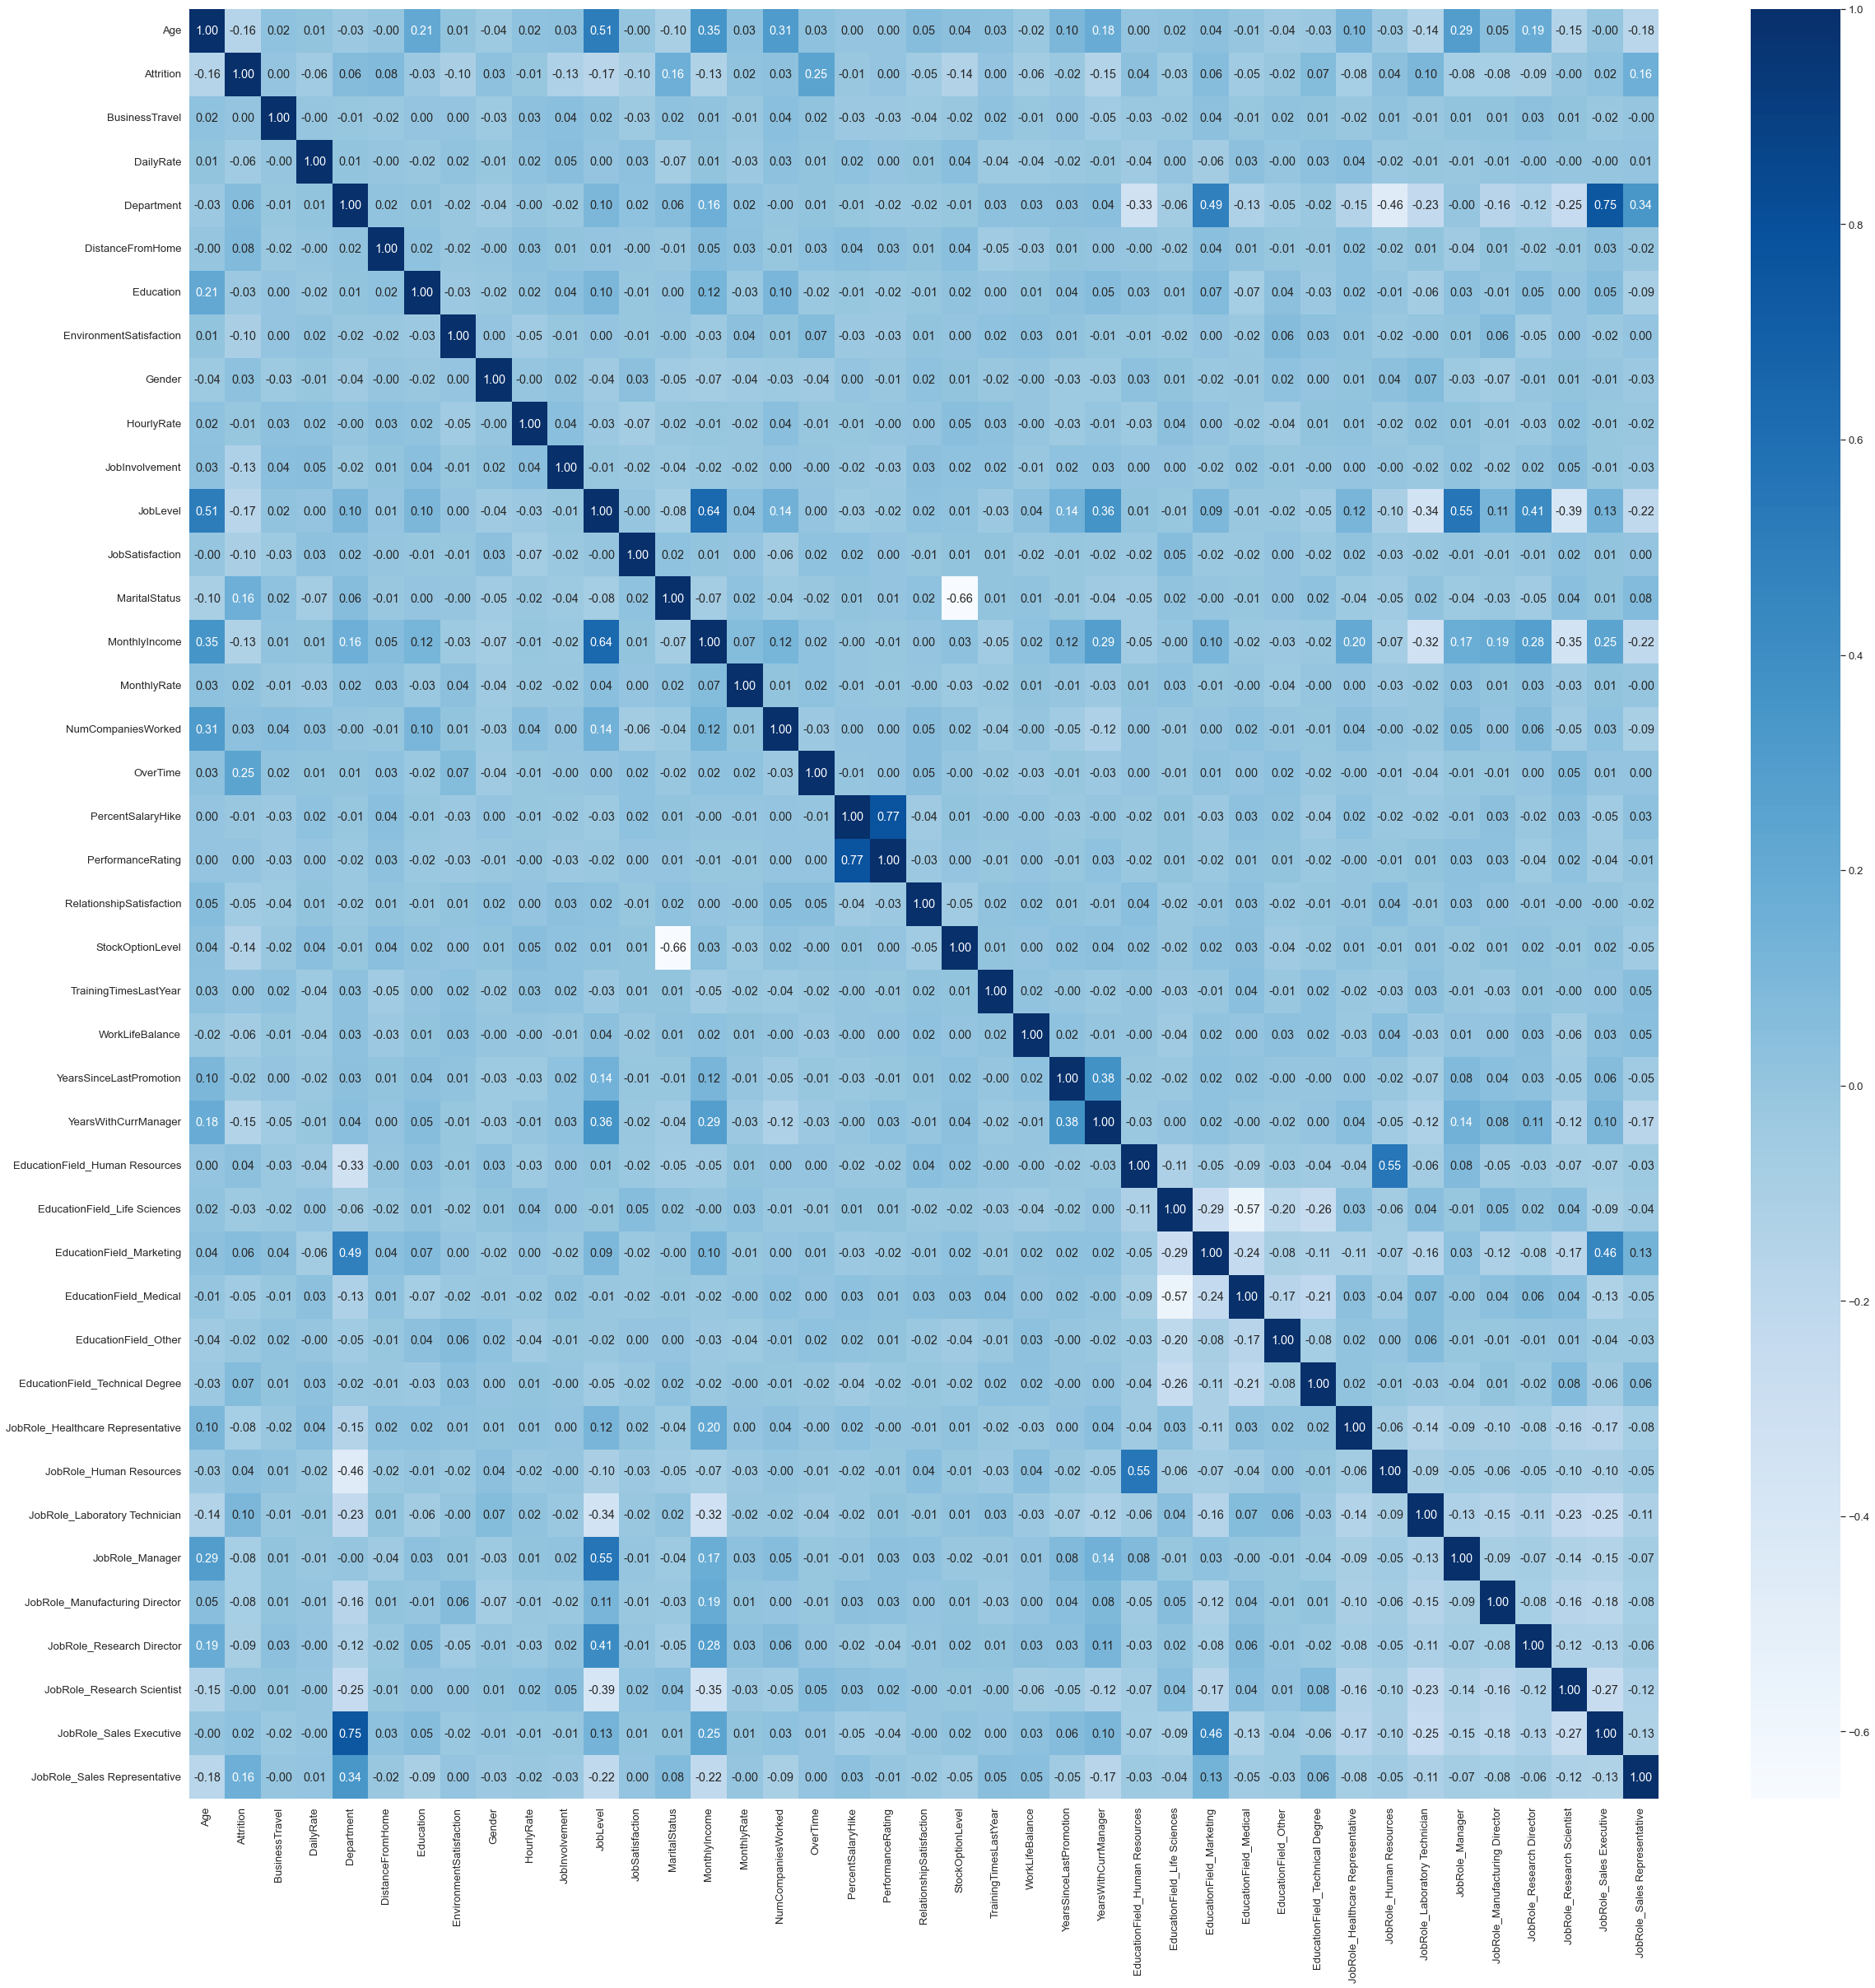

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

## FEATURE SELECTION

membuang salah satu kolom yang memiliki corelasi > 70% yang kemungkinan akan redundan, Department, PerformanceRating

In [44]:
drop_columns = ['Department','PerformanceRating','Attrition']

In [45]:
X = df_new.drop(drop_columns, axis=1)
Y = df_new['Attrition']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   BusinessTravel                     1470 non-null   int8   
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int32  
 5   EnvironmentSatisfaction            1470 non-null   int32  
 6   Gender                             1470 non-null   int8   
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int32  
 9   JobLevel                           1470 non-null   int32  
 10  JobSatisfaction                    1470 non-null   int32  
 11  MaritalStatus                      1470 non-null   int8 

## FEATURE EXTRACTION
Tidak ada Feature baru yang ditambahkan, data yang dimiliki dirasa cukup untuk melakukan Model

## FEATURE TAMBAHAN

- `Stress Level` akan sangat membantu ketika mengetahui tingkat stress karyawan dalam melakukan pekerjaan, sehingga kita bisa paham, apakah perusahaan ini memiliki tingkat stress yang tinggi atau tidak
- `Health` alasan kesehatan biasanya menjadi salah satu faktor pergi atau tidaknya seorang karyawan
- `Companyinfrastructure` biasanya hal ini juga jadi pertimbangan karyawan untuk menetap atau pindah kantor
- `Appreciation` kadang hal seperti apresiasi menajdi hal yang membuat betah di suatu lingkungan. 

## DATA SPLITING

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)